<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [2]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
from pylab import *
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [3]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url='http://yustiks.ru/dataset/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(url,  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное



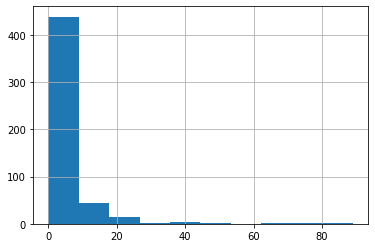

In [6]:
plt.hist(data['CRIM'])
plt.grid(True)
#геометрическое

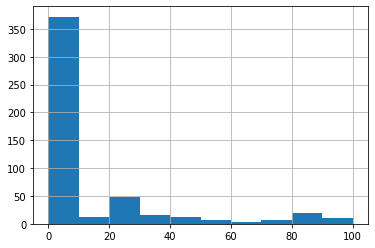

In [11]:
plt.hist(data['ZN'])
plt.grid(True)

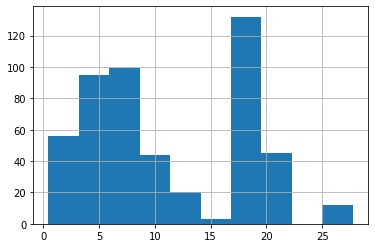

In [12]:
plt.hist(data['INDUS'])
plt.grid(True)

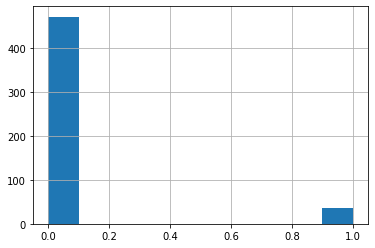

In [13]:
plt.hist(data['CHAS'])
plt.grid(True)
#Бернулли

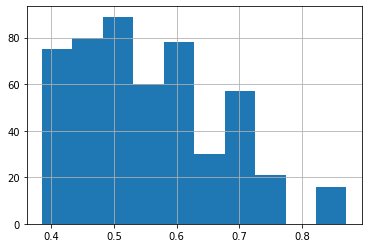

In [14]:
plt.hist(data['NOX'])
plt.grid(True)

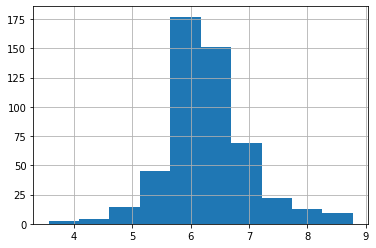

In [15]:
plt.hist(data['RM'])
plt.grid(True)
#логнормальное

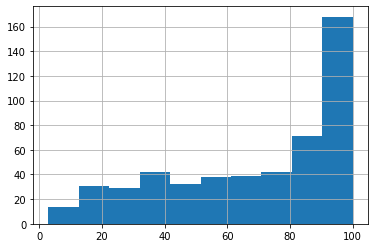

In [16]:
plt.hist(data['AGE'])
plt.grid(True)

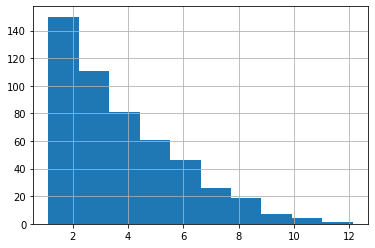

In [17]:
plt.hist(data['DIS'])
plt.grid(True)
#геометрическое

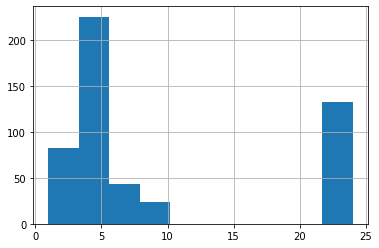

In [18]:
plt.hist(data['RAD'])
plt.grid(True)

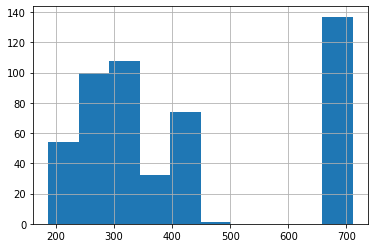

In [19]:
plt.hist(data['TAX'])
plt.grid(True)

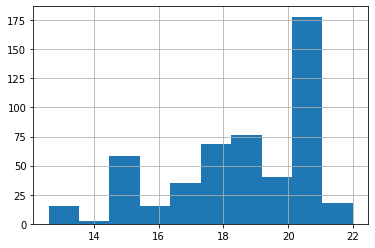

In [20]:
plt.hist(data['PTRATIO'])
plt.grid(True)

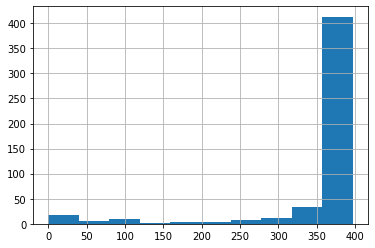

In [21]:
plt.hist(data['B'])
plt.grid(True)

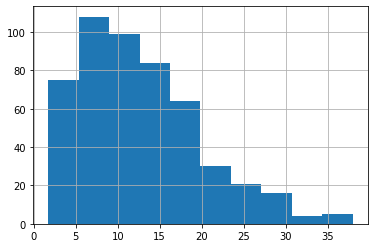

In [22]:
plt.hist(data['LSTAT'])
plt.grid(True)
#Биноминальное

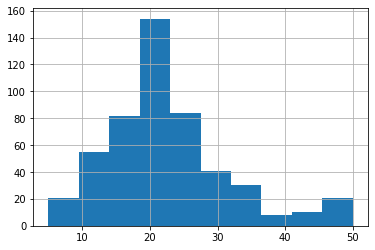

In [23]:
plt.hist(data['MEDV'])
plt.grid(True)

Написать **линейную регрессию** на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT. 



1.   Разделить данные на 80% тренировочных, 20% тестовых
2.   Составить модель линейной регрессии
3.   Посчитать ошибку модели на тестовых данных
4.   Сделать точечный график данных и полученной прямой линейной регрессии



In [54]:
MEDV = np.array(data['MEDV']).reshape(-1,1)
LSTAT = np.array(data['LSTAT']).reshape(-1,1)
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(MEDV,LSTAT,test_size = 0.2)

In [57]:
model.fit(X_train, y_train)
predicted_y = model.predict(X_test)
model.score(X_test, y_test)

0.5785005526863096

(0, 40)

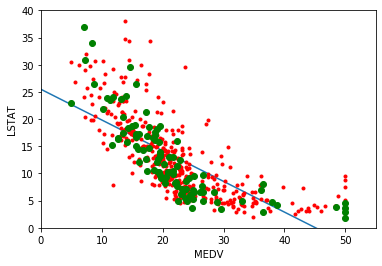

In [56]:
plt.xlabel('MEDV')
plt.ylabel('LSTAT')
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'go')
plt.xlim(0,55)
plt.ylim(0,40)

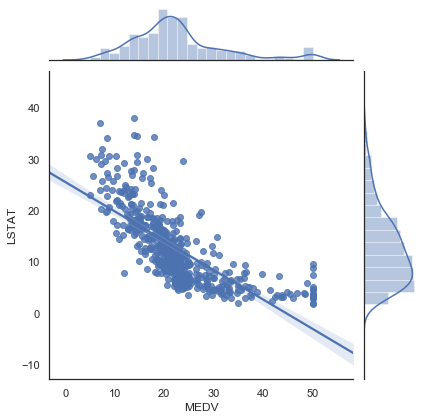

In [65]:
sns.jointplot(x=data['MEDV'], y=data['LSTAT'], data=data, kind='reg')


Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно. 

In [31]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()
data.cov()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
Ladder,2041.000000,1100.838710,995.928571,1061.207792,1657.428571,1108.090909,370.874150,1008.948052,1615.000000,1613.369128
SD of Ladder,1100.838710,2041.000000,173.694805,1259.805195,1219.519481,512.363636,506.897959,797.779221,1254.526490,1208.026846
Positive affect,995.928571,173.694805,2015.000000,785.240260,778.331169,1373.766234,405.292517,715.077922,586.120000,647.908897
Negative affect,1061.207792,1259.805195,785.240260,2015.000000,1253.103896,866.935065,309.231293,681.525974,1050.926667,944.803192
Social support,1657.428571,1219.519481,778.331169,1253.103896,2015.000000,904.538961,230.741497,891.500000,1509.293333,1471.919100
Freedom,1108.090909,512.363636,1373.766234,866.935065,904.538961,2015.000000,736.268707,987.331169,800.926667,821.386087
Corruption,370.874150,506.897959,405.292517,309.231293,230.741497,736.268707,1837.666667,511.333333,368.289773,233.044951
Generosity,1008.948052,797.779221,715.077922,681.525974,891.500000,987.331169,511.333333,2015.000000,949.020000,836.343869
Log of GDP\nper capita,1615.000000,1254.526490,586.120000,1050.926667,1509.293333,800.926667,368.289773,949.020000,1938.000000,1614.025970
Healthy life\nexpectancy,1613.369128,1208.026846,647.908897,944.803192,1471.919100,821.386087,233.044951,836.343869,1614.025970,1887.500000


Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop).

In [25]:
sum(data.isnull().sum())

# В country нет пропущенных.

23

Сколько стран в выборке? Написать ответ. 

In [21]:
len(data['Country (region)'].unique())

156

Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

In [29]:
np.round_(data.corr(), decimals=2)
#Есть высокий уровень корреляции между ladder (удовлетворенность жизнью) и соц.поддержки, ВВП на душу населени и здоровьем.
#А вот уровень корупции с остальными показателями коррелирует слабо

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
Ladder,1.00,0.54,0.49,0.52,0.82,0.55,0.19,0.50,0.81,0.82
SD of Ladder,0.54,1.00,0.09,0.62,0.60,0.25,0.26,0.39,0.63,0.61
Positive affect,0.49,0.09,1.00,0.39,0.39,0.68,0.21,0.35,0.30,0.33
Negative affect,0.52,0.62,0.39,1.00,0.62,0.43,0.16,0.34,0.54,0.49
Social support,0.82,0.60,0.39,0.62,1.00,0.45,0.12,0.44,0.77,0.74
Freedom,0.55,0.25,0.68,0.43,0.45,1.00,0.38,0.49,0.41,0.42
Corruption,0.19,0.26,0.21,0.16,0.12,0.38,1.00,0.27,0.20,0.12
Generosity,0.50,0.39,0.35,0.34,0.44,0.49,0.27,1.00,0.48,0.43
Log of GDP\nper capita,0.81,0.63,0.30,0.54,0.77,0.41,0.20,0.48,1.00,0.85
Healthy life\nexpectancy,0.82,0.61,0.33,0.49,0.74,0.42,0.12,0.43,0.85,1.00


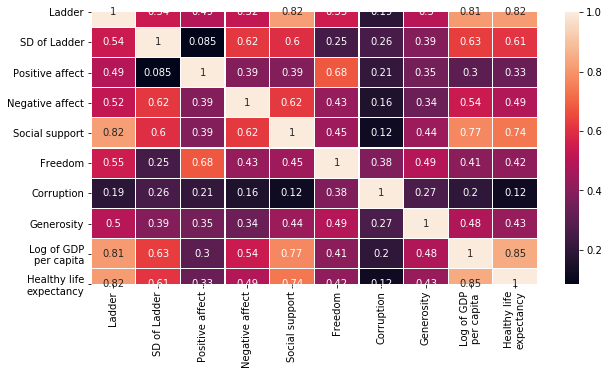

In [62]:
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(), annot=True, linewidths=.2)

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

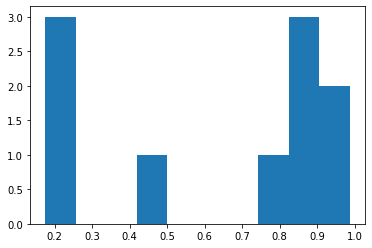

<module 'matplotlib.pyplot' from 'C:\\Users\\HP\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

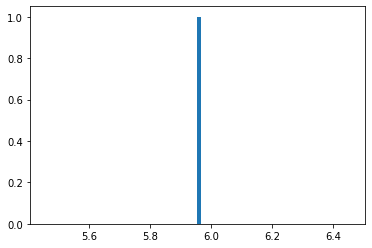

In [85]:
# values = np.random.randint(1, 7, size=10)
# plt.hist(values, bins=[1, 2, 3, 4, 5, 6])
number_of_randoms = 10
plt.hist(np.random.rand(number_of_randoms))
plt.show()
number_of_sums = 1
X1 = np.zeros([number_of_sums])
for i in range(number_of_sums):
    X1[i] = np.sum(np.random.rand(number_of_randoms))
plt.hist(X1, 100)
plt

моделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?

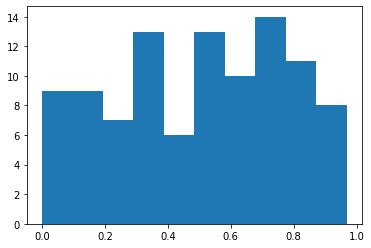

<module 'matplotlib.pyplot' from 'C:\\Users\\HP\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

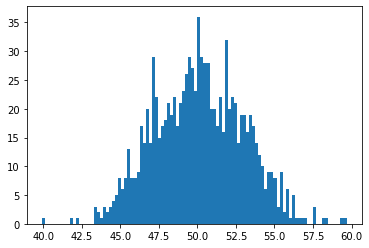

In [82]:
#После моделирования распределение получилось близким к нормальному
# Исходное распределение на нормальное мало похоже, но при увеличении кол-ва бросков и серий распределение близится к нормальному


number_of_randoms = 100
plt.hist(np.random.rand(number_of_randoms))
plt.show()
number_of_sums = 1000
X1 = np.zeros([number_of_sums])
for i in range(number_of_sums):
    X1[i] = np.sum(np.random.rand(number_of_randoms))
plt.hist(X1, 100)
plt